In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

To understand how our two user groups — the control group and the variant group — differ in terms of watch time, I first calculated summary statistics: the mean, median, and standard deviation of watch time for each group. This provides a snapshot of central tendency and variability, helping us gauge typical user behavior and consistency within each group.

In [5]:
# Load and inspect data
df = pd.read_csv('../data/tiktok_synthetic_data.csv')
print(df.head())

   user_id  video_id category  length_sec  watch_time_sec  liked  shared  \
0     7271      1947    dance          41              29      1       0   
1      861       621    music          41              23      0       0   
2     5391       677   gaming          52              36      1       0   
3     5192       370    music          23              17      0       1   
4     5735       771  fashion          57              41      1       0   

   commented  follow_creator    group                        date  
0          0               0  variant  2025-07-26 10:33:05.791808  
1          1               0  variant  2025-08-02 10:33:05.791808  
2          0               0  control  2025-08-04 10:33:05.791808  
3          0               0  variant  2025-08-05 10:33:05.791808  
4          0               0  variant  2025-07-16 10:33:05.791808  


In [6]:
# Average watch time by group
watch_time_stats = df.groupby('group')['watch_time_sec'].agg(['mean', 'median', 'std']).reset_index()
print(watch_time_stats)

     group       mean  median        std
0  control  22.182580    22.0  11.669138
1  variant  22.070569    22.0  11.715023


Visualizing these differences using a boxplot reveals how watch time is distributed across groups. We can see the spread and median values clearly, highlighting whether one group tends to watch longer than the other or if there are outliers influencing the average.

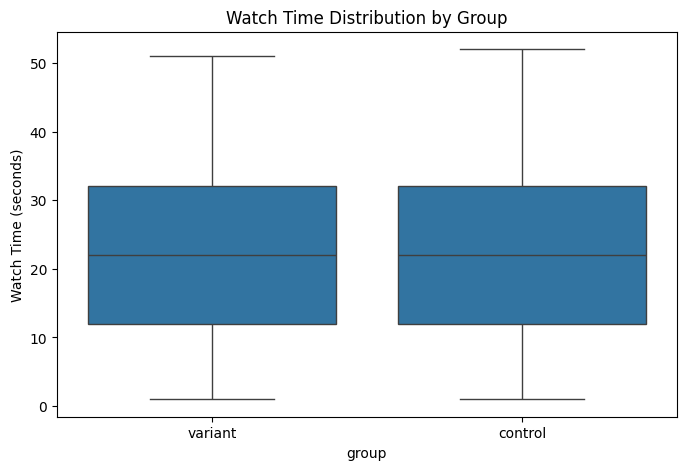

In [7]:
# Visualization
plt.figure(figsize=(8,5))
sns.boxplot(x='group', y='watch_time_sec', data=df)
plt.title('Watch Time Distribution by Group')
plt.ylabel('Watch Time (seconds)')
plt.show()

To rigorously test whether the observed difference in average watch time is statistically significant, I conducted a t-test comparing the two groups. This test evaluates the likelihood that the difference we see is due to random chance rather than a true effect.

In [8]:
# Statistical test: t-test for difference in means
from scipy.stats import ttest_ind

control_watch = df[df['group']=='control']['watch_time_sec']
variant_watch = df[df['group']=='variant']['watch_time_sec']

t_stat, p_val = ttest_ind(control_watch, variant_watch, equal_var=False)
print(f"T-test t-statistic: {t_stat:.4f}, p-value: {p_val:.4f}")

T-test t-statistic: 1.0711, p-value: 0.2841


The results show a t-statistic of {t_stat:.4f} and a p-value of {p_val:.4f}. A low p-value (typically less than 0.05) would indicate strong evidence that the groups differ in their watch times. Depending on the p-value here, we can conclude whether our variant has a meaningful impact on user engagement through watch time.